In [64]:
# load libraries used in script

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

import scipy as scipy
from scipy.ndimage.interpolation import rotate

import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

#from PIL.ExifTags import TAGS, GPSTAGS
from astropy.io import fits
from astropy.coordinates import FK5

# PyEphem  https://rhodesmill.org/pyephem/quick.html#bodies
import ephem
import datetime

import time as time
import csv
from datetime import datetime
from datetime import timedelta

import json

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14


In [5]:
inFolder = 'stars/GJ109'
# read the image file names in folder
#  based on examples at https://realpython.com/working-with-files-in-python/#directory-listing-in-modern-python-versions

files = []
times = np.array([])

with os.scandir(inFolder) as dir_contents:
    for entry in dir_contents:
        info = entry.stat()
        files.append(entry.name)
        np.append(times,info.st_mtime)
        
        # check file names and that times are ascending
        print(entry.name, info.st_mtime)
        
# identify how many files are there
print(len(files))

plot_xsl_X0792.png 1603086131.6988115
xsl_spectrum_X0792_nir.fits 1603086065.2882485
GJ 109.pdf 1603086417.5872035
xsl_spectrum_X0792_uvb.fits 1603086061.8672712
xsl_spectrum_X0792_vis.fits 1603086065.4488096
5


In [11]:
i = 1
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)
#help(hdulist)
hdulist.info()

hdu = hdulist[0]
hdu.header



file number, name:  1 xsl_spectrum_X0792_nir.fits
Filename: stars/GJ109/xsl_spectrum_X0792_nir.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  SPECTRUM      1 BinTableHDU     43   24750R x 3C   [E, E, E]   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-01-09'         / Date this file was written                     
DISPELEM= 'NIR     '           / Dispersive element name                        
SPECSYS = 'SOURCE  '           / Reference frame for spectral coordinates       
EXT_OBJ =                    F / TRUE if extended                               
OBJECT  = 'GJ109   '           / Machine-readable name of the star              
HNAME   = 'GJ 109  '           / Humane-readable name of the star               
XSL_ID  = 'X0792   '           / X-shooter Spectral Library unique identifier   
XSL_NAME= 'X0792_N_N'          / Internal name for the science spectrum         
RA      =            41.0646

In [26]:
hdu = hdulist[1]
data = hdu.data
print(np.shape(data))


(24750,)


In [27]:
# http://xsl.u-strasbg.fr/page_dr2_faq.html
print(data[0])
print(data[0][0])

(993.98175, 7.845992e-13, 9.023971e-14)
993.98175


In [28]:
wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])

In [29]:
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])

In [30]:
print(len(data))
print(data[i][0])

24750
2478.8647


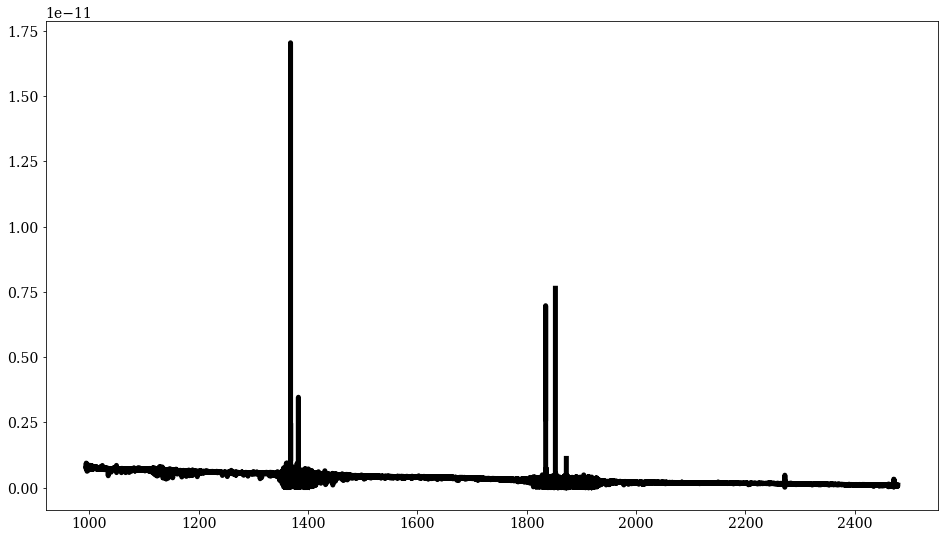

In [31]:
fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=5, label='IR')


In [147]:
## Process GJ 109

inFolder = 'stars/GJ109'
# read the image file names in folder
#  based on examples at https://realpython.com/working-with-files-in-python/#directory-listing-in-modern-python-versions
files = []
times = np.array([])

with os.scandir(inFolder) as dir_contents:
    for entry in dir_contents:
        info = entry.stat()
        files.append(entry.name)
        np.append(times,info.st_mtime)
        
        # check file names and that times are ascending
        print(entry.name, info.st_mtime)
        
# identify how many files are there
print(len(files))

plot_xsl_X0792.png 1603086131.6988115
xsl_spectrum_X0792_nir.fits 1603086065.2882485
GJ 109.pdf 1603086417.5872035
xsl_spectrum_X0792_uvb.fits 1603086061.8672712
xsl_spectrum_X0792_vis.fits 1603086065.4488096
5


In [148]:
# load NIR spectrum
i = 1
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
NIR_wavelengths = wavelengths
NIR_flux = flux
NIR_fluxerr = fluxerr


# load VIS spectrum
i = 4
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
VIS_wavelengths = wavelengths
VIS_flux = flux
VIS_fluxerr = fluxerr


# load UVB spectrum
i = 3
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
UVB_wavelengths = wavelengths
UVB_flux = flux
UVB_fluxerr = fluxerr

file number, name:  1 xsl_spectrum_X0792_nir.fits
file number, name:  4 xsl_spectrum_X0792_vis.fits
file number, name:  3 xsl_spectrum_X0792_uvb.fits


(0, 1e-12)

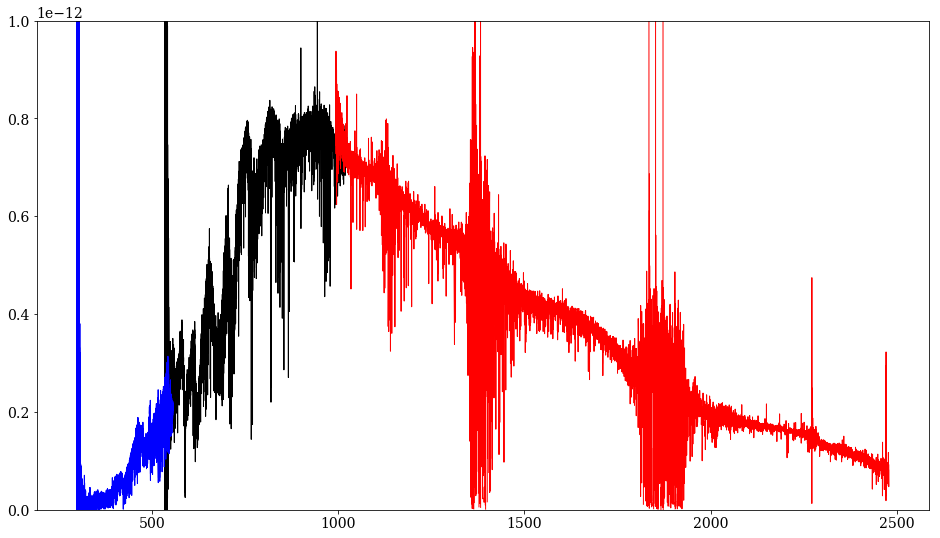

In [124]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

#plt.xlim(200,1000)
plt.ylim(0,1E-12)


(0, 1e-12)

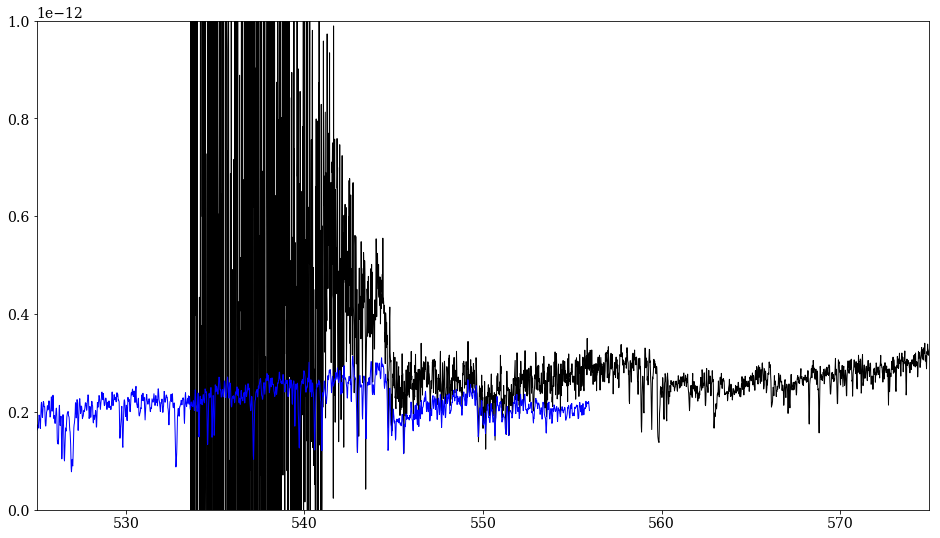

In [125]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(525,575)
plt.ylim(0,1E-12)

#use UVB up to 550, then VIS

(0, 1e-12)

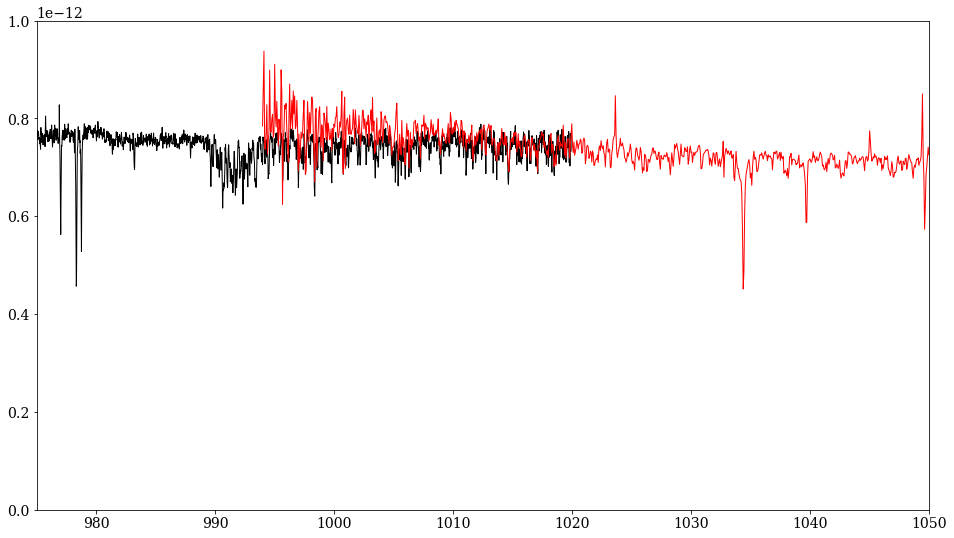

In [126]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(975,1050)
plt.ylim(0,1E-12)

#use VIS up to 1015, then NIR

(0, 1e-12)

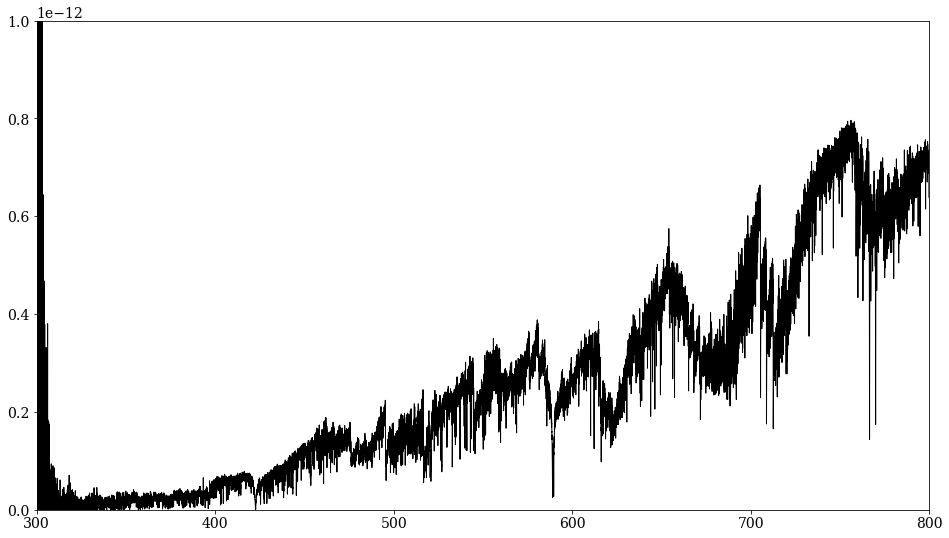

In [149]:
# assemble wavelength and flux
# ignore fluxerr for now
#use UVB up to 550, then VIS
#use VIS up to 1015, then NIR

useUVB = UVB_wavelengths < 550
useVIS = (VIS_wavelengths > 550) & (VIS_wavelengths < 1015)
useNIR = NIR_wavelengths > 1015

wavelengths = np.append(np.append(UVB_wavelengths[useUVB], VIS_wavelengths[useVIS]), NIR_wavelengths[useNIR])
flux = np.append(np.append(UVB_flux[useUVB], VIS_flux[useVIS]), NIR_flux[useNIR])
fluxerr = np.append(np.append(UVB_fluxerr[useUVB], VIS_fluxerr[useVIS]), NIR_fluxerr[useNIR])

fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
#plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
#plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
#plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')
plt.xlim(300,800)
plt.ylim(0,1E-12)



(0, 1e-12)

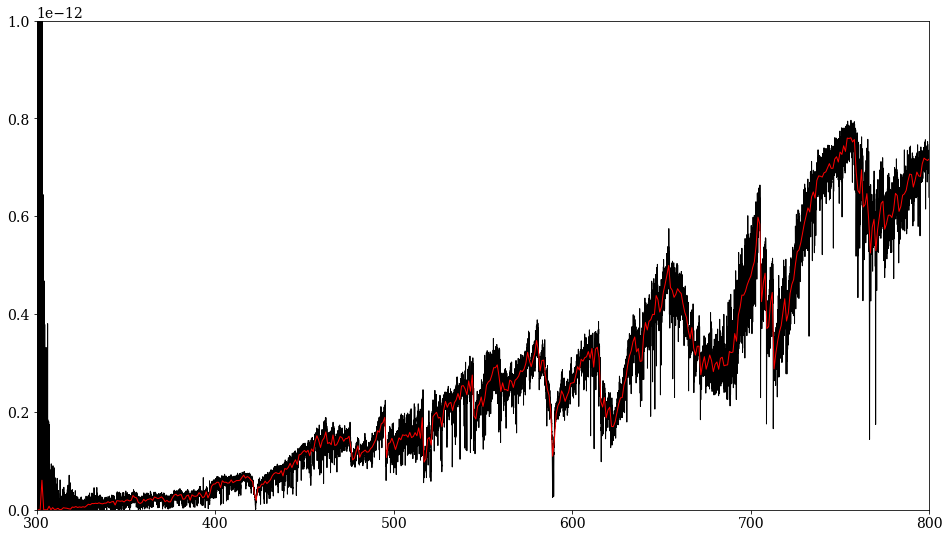

In [150]:
# generate 1 nm binned spectrum to use in visualizer

outWave = np.arange(300,801,1)
outFlux = np.array([])

for i in outWave:
    useFlux = np.absolute(wavelengths - i) < 0.5
    outFlux = np.append(outFlux, np.mean(flux[useFlux]))
    
# check for less than zero values
test = outFlux < 0
if np.sum(test) > 0:
    outFlux[test] = 0

fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
plt.plot(outWave, outFlux, color='red',linewidth=1, label='binned')
#plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
#plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')
plt.xlim(300,800)
plt.ylim(0,1E-12)


In [151]:
stars = {}
stars['GJ109'] = []
stars['GJ109'].append({
    'wavelength': outWave.tolist(),
    'flux':outFlux.tolist()
})

print(stars)

{'GJ109': [{'wavelength': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494

In [96]:
## START HD 4906

In [155]:
inFolder = 'stars/HD4906'
# read the image file names in folder
#  based on examples at https://realpython.com/working-with-files-in-python/#directory-listing-in-modern-python-versions
files = []
times = np.array([])

with os.scandir(inFolder) as dir_contents:
    for entry in dir_contents:
        info = entry.stat()
        files.append(entry.name)
        np.append(times,info.st_mtime)
        
        # check file names and that times are ascending
        print(entry.name, info.st_mtime)
        
# identify how many files are there
print(len(files))

plot_xsl_X0753.png 1603086363.1337242
HD 4906.pdf 1603086399.9722023
xsl_spectrum_X0753_nir.fits 1603086348.7486207
xsl_spectrum_X0753_vis.fits 1603086348.5755205
xsl_spectrum_X0753_uvb.fits 1603086346.829814
5


In [156]:
# load NIR spectrum
i = 2
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
NIR_wavelengths = wavelengths
NIR_flux = flux
NIR_fluxerr = fluxerr

# load VIS spectrum
i = 3
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
VIS_wavelengths = wavelengths
VIS_flux = flux
VIS_fluxerr = fluxerr

# load UVB spectrum
i = 4
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
UVB_wavelengths = wavelengths
UVB_flux = flux
UVB_fluxerr = fluxerr

file number, name:  2 xsl_spectrum_X0753_nir.fits
file number, name:  3 xsl_spectrum_X0753_vis.fits
file number, name:  4 xsl_spectrum_X0753_uvb.fits


(0, 1.5e-12)

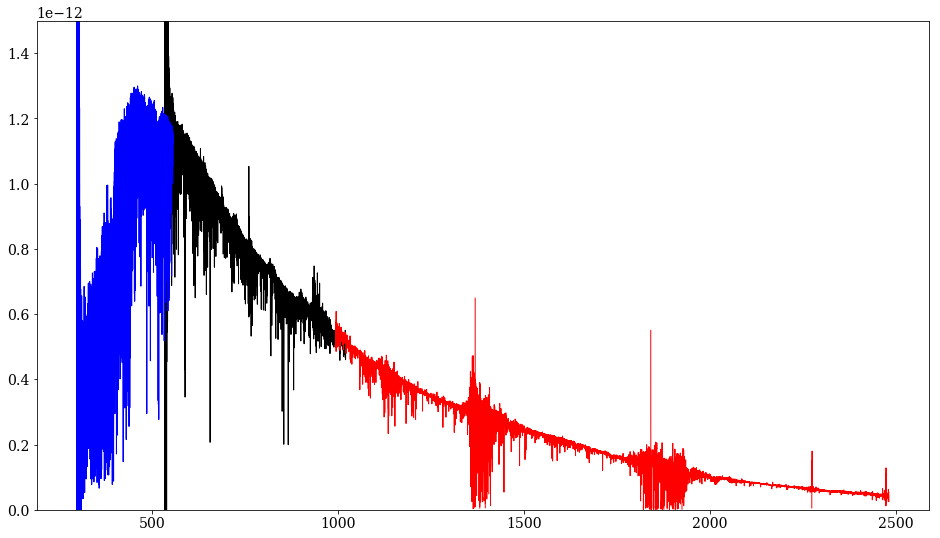

In [157]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

#plt.xlim(200,1000)
plt.ylim(0,1.5E-12)


(0, 1.5e-12)

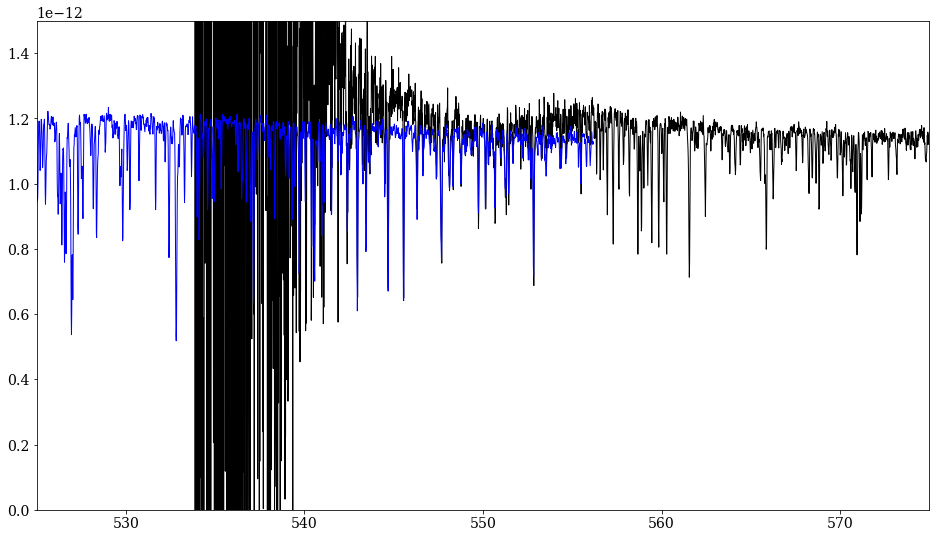

In [158]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(525,575)
plt.ylim(0,1.5E-12)


(0, 1.5e-12)

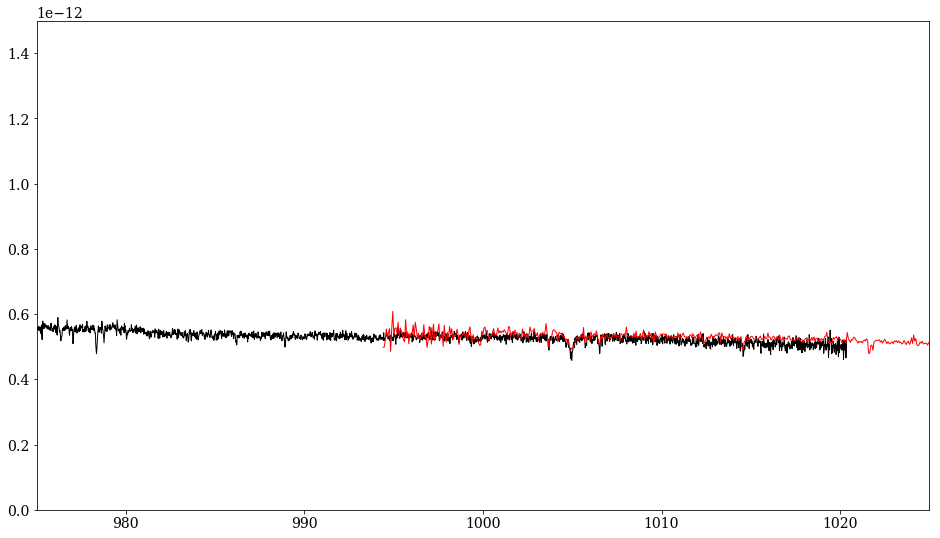

In [159]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(975,1025)
plt.ylim(0,1.5E-12)


(0, 1.5e-12)

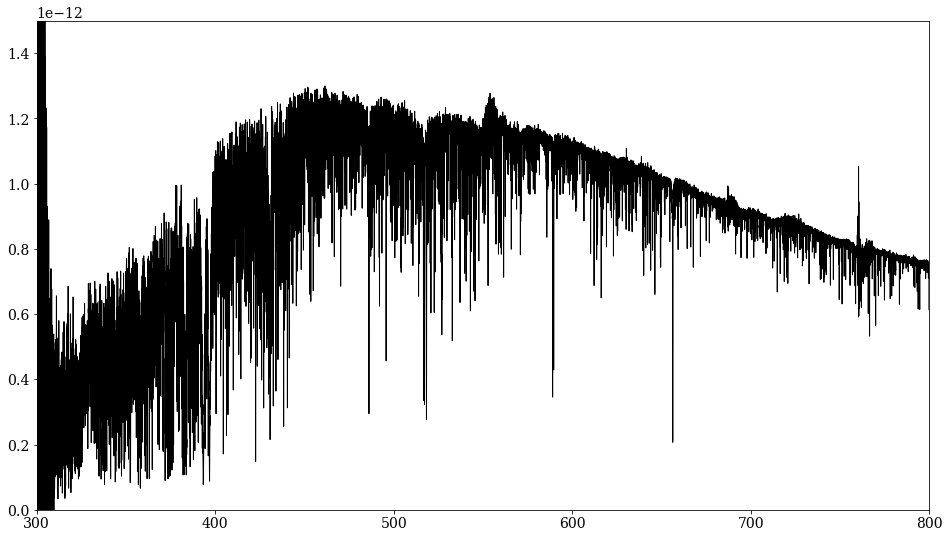

In [160]:
# assemble wavelength and flux
# ignore fluxerr for now
#use UVB up to 550, then VIS
#use VIS up to 1015, then NIR

useUVB = UVB_wavelengths < 550
useVIS = (VIS_wavelengths > 550) & (VIS_wavelengths < 1015)
useNIR = NIR_wavelengths > 1015

wavelengths = np.append(np.append(UVB_wavelengths[useUVB], VIS_wavelengths[useVIS]), NIR_wavelengths[useNIR])
flux = np.append(np.append(UVB_flux[useUVB], VIS_flux[useVIS]), NIR_flux[useNIR])
fluxerr = np.append(np.append(UVB_fluxerr[useUVB], VIS_fluxerr[useVIS]), NIR_fluxerr[useNIR])

fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
plt.xlim(300,800)
plt.ylim(0,1.5E-12)



(0, 1.5e-12)

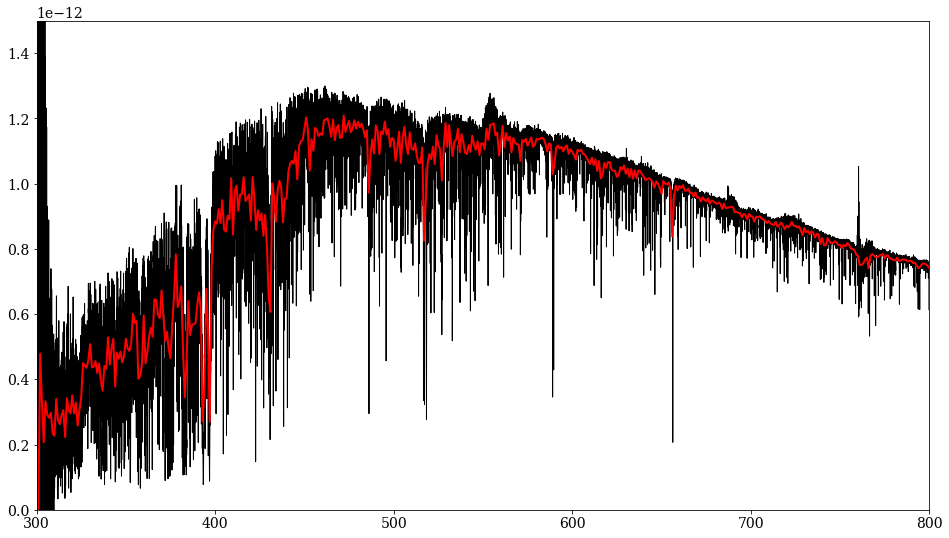

In [161]:
# generate 1 nm binned spectrum to use in visualizer

outWave = np.arange(300,801,1)
outFlux = np.array([])

for i in outWave:
    useFlux = np.absolute(wavelengths - i) < 0.5
    outFlux = np.append(outFlux, np.mean(flux[useFlux]))

# check for less than zero values
test = outFlux < 0
if np.sum(test) > 0:
    outFlux[test] = 0
    
fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
plt.plot(outWave, outFlux, color='red',linewidth=2, label='binned')
#plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
#plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')
plt.xlim(300,800)
plt.ylim(0,1.5E-12)


In [162]:
stars['HD4906'] = []
stars['HD4906'].append({
    'wavelength': outWave.tolist(),
    'flux':outFlux.tolist()
})

print(stars)
#json.dumps(stars, indent=4)

#with open('stellarSpectra.json', 'w') as outfile:
#    json.dump(stars,outfile)

{'GJ109': [{'wavelength': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494

In [163]:
## Start HD 34797

In [164]:
inFolder = 'stars/HD34797'
# read the image file names in folder
#  based on examples at https://realpython.com/working-with-files-in-python/#directory-listing-in-modern-python-versions
files = []
times = np.array([])

with os.scandir(inFolder) as dir_contents:
    for entry in dir_contents:
        info = entry.stat()
        files.append(entry.name)
        np.append(times,info.st_mtime)
        
        # check file names and that times are ascending
        print(entry.name, info.st_mtime)
        
# identify how many files are there
print(len(files))

HD 34797.pdf 1603086664.4212115
plot_xsl_X0113.png 1603086724.4064424
xsl_spectrum_X0113_vis.fits 1603086672.1508021
xsl_spectrum_X0113_uvb.fits 1603086670.6875288
xsl_spectrum_X0113_nir.fits 1603086673.153095
5


In [165]:
# load NIR spectrum
i = 4
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
NIR_wavelengths = wavelengths
NIR_flux = flux
NIR_fluxerr = fluxerr

# load VIS spectrum
i = 2
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
VIS_wavelengths = wavelengths
VIS_flux = flux
VIS_fluxerr = fluxerr

# load UVB spectrum
i = 3
filename = files[i]
print("file number, name: ", i, files[i])
hdulist = fits.open(inFolder+'/'+filename)

hdu = hdulist[1]
data = hdu.data

wavelengths = np.array([])
flux = np.array([])
fluxerr = np.array([])
for i in range(len(data)):
    wavelengths = np.append(wavelengths, data[i][0])
    flux = np.append(flux, data[i][1])
    fluxerr = np.append(fluxerr, data[i][2])
    
UVB_wavelengths = wavelengths
UVB_flux = flux
UVB_fluxerr = fluxerr

file number, name:  4 xsl_spectrum_X0113_nir.fits
file number, name:  2 xsl_spectrum_X0113_vis.fits
file number, name:  3 xsl_spectrum_X0113_uvb.fits


(0, 3e-11)

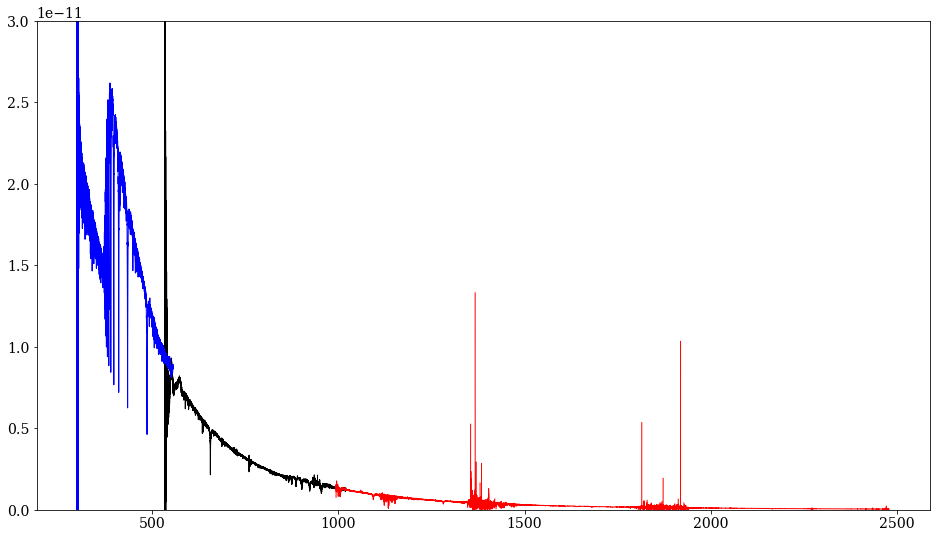

In [167]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

#plt.xlim(200,1000)
plt.ylim(0,3E-11)


(0, 3e-11)

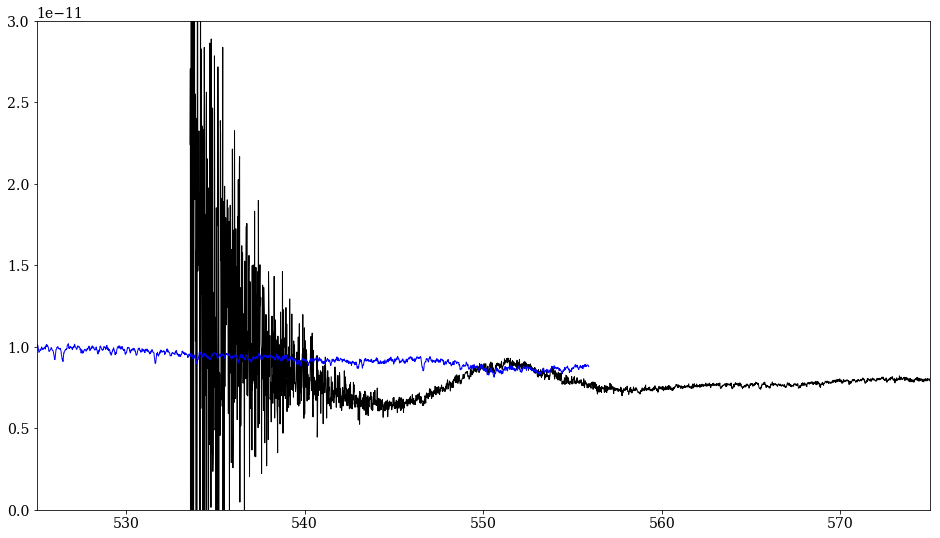

In [168]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(525,575)
plt.ylim(0,3E-11)


(0, 2e-12)

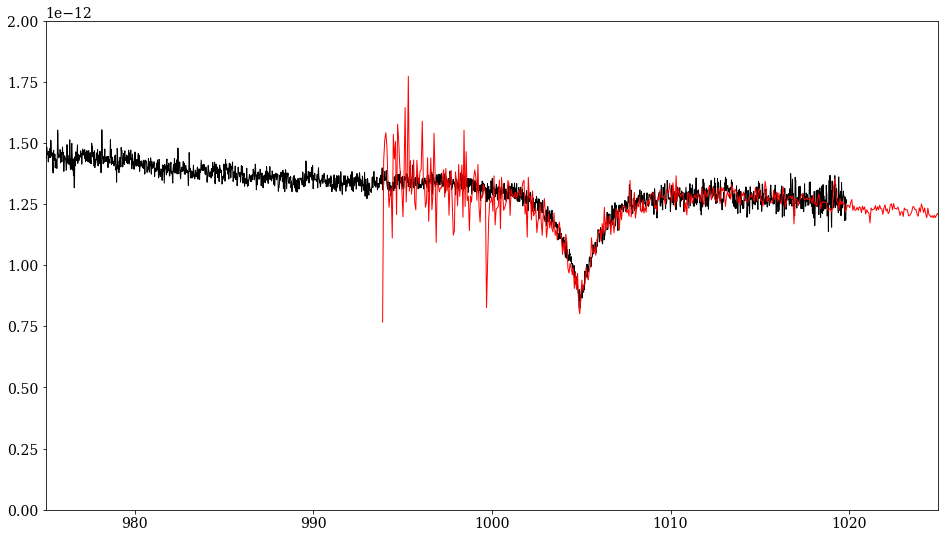

In [169]:
fig = plt.figure(figsize=(16,9))
plt.plot(VIS_wavelengths, VIS_flux, color='black',linewidth=1, label='VIS')
plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')

plt.xlim(975,1025)
plt.ylim(0,2E-12)


(0, 3e-11)

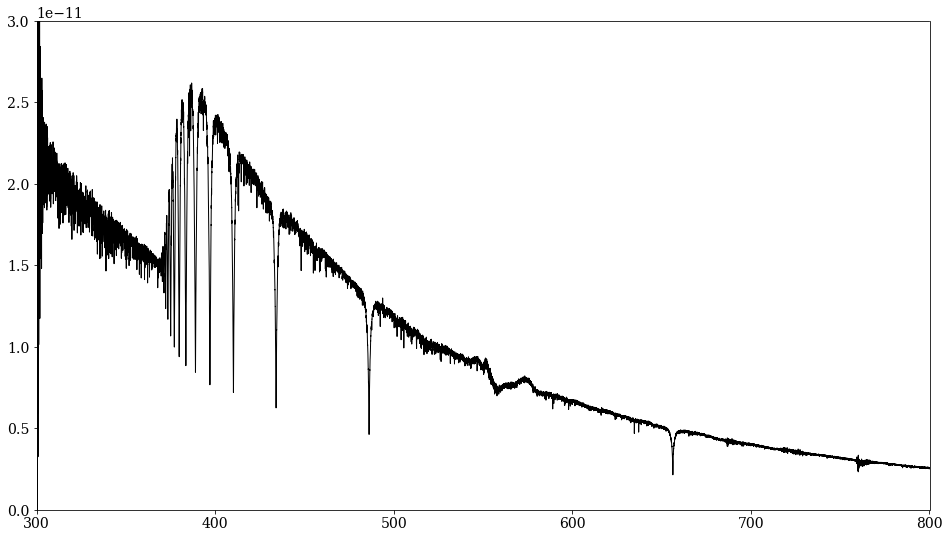

In [170]:
# assemble wavelength and flux
# ignore fluxerr for now
#use UVB up to 550, then VIS
#use VIS up to 1015, then NIR

useUVB = UVB_wavelengths < 550
useVIS = (VIS_wavelengths > 550) & (VIS_wavelengths < 1015)
useNIR = NIR_wavelengths > 1015

wavelengths = np.append(np.append(UVB_wavelengths[useUVB], VIS_wavelengths[useVIS]), NIR_wavelengths[useNIR])
flux = np.append(np.append(UVB_flux[useUVB], VIS_flux[useVIS]), NIR_flux[useNIR])
fluxerr = np.append(np.append(UVB_fluxerr[useUVB], VIS_fluxerr[useVIS]), NIR_fluxerr[useNIR])

fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
plt.xlim(300,800)
plt.ylim(0,3E-11)



(0, 3e-11)

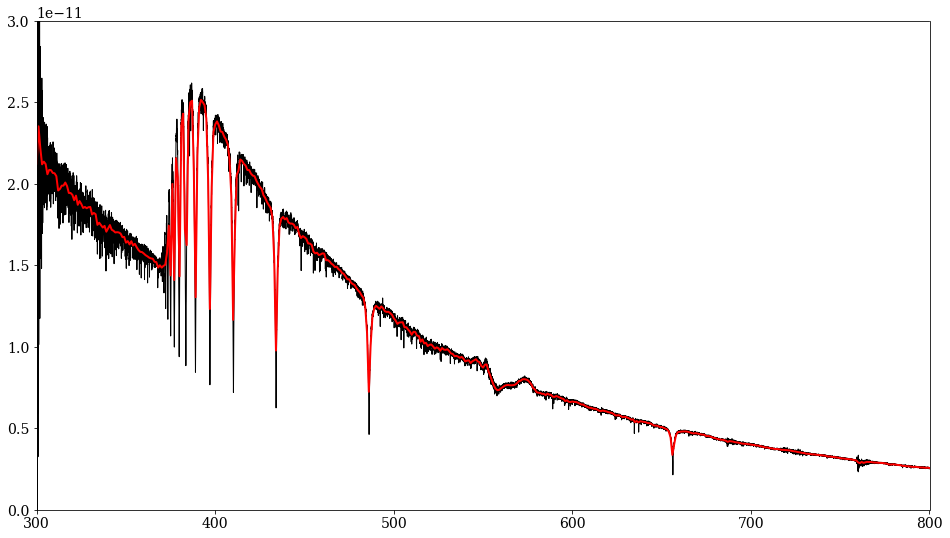

In [171]:
# generate 1 nm binned spectrum to use in visualizer

outWave = np.arange(300,801,1)
outFlux = np.array([])

for i in outWave:
    useFlux = np.absolute(wavelengths - i) < 0.5
    outFlux = np.append(outFlux, np.mean(flux[useFlux]))

# check for less than zero values
test = outFlux < 0
if np.sum(test) > 0:
    outFlux[test] = 0

fig = plt.figure(figsize=(16,9))
plt.plot(wavelengths, flux, color='black',linewidth=1, label='all')
plt.plot(outWave, outFlux, color='red',linewidth=2, label='binned')
#plt.plot(NIR_wavelengths, NIR_flux, color='red',linewidth=1, label='NIR')
#plt.plot(UVB_wavelengths, UVB_flux, color='blue',linewidth=1, label='UVB')
plt.xlim(300,800)
plt.ylim(0,3E-11)


In [172]:
stars['HD34797'] = []
stars['HD34797'].append({
    'wavelength': outWave.tolist(),
    'flux':outFlux.tolist()
})

print(stars)
#json.dumps(stars, indent=4)

#with open('stellarSpectra.json', 'w') as outfile:
#    json.dump(stars,outfile)

{'GJ109': [{'wavelength': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494

In [173]:
## Export stellar spectra

json.dumps(stars, indent=4)

with open('stellarSpectra.json', 'w') as outfile:
    json.dump(stars,outfile, indent=4)

In [ ]:
# after exporting, make a copy as a .js file, 
# with variable declaration at the head